# Chapter 1

In [61]:
# data prep
import pandas as pd
import numpy as np
from sklearn.datasets import load_svmlight_files

# libsvm source file bag of words...
X_train_raw, y_train_raw, X_test_raw, y_test_raw = load_svmlight_files(("./aclImdb/train/labeledBow.feat", "./aclImdb/test/labeledBow.feat"))

# sparse matrix vertical concatenation
from scipy.sparse import vstack

# to match shape of exercise:
# first half are positive reviews
# last half are negative reviews
X_train = vstack((X_train_raw[:1000, :2500], X_train_raw[24000:25000, :2500]))
y_train = np.concatenate((y_train_raw[:1000], y_train_raw[24000:25000]))
print(X_train.shape)
print(np.unique(y_train, return_counts=True))

X_test  = vstack((X_test_raw[:1000, :2500],  X_test_raw[24000:25000, :2500]))
y_test  = np.concatenate([y_test_raw[:1000],  y_test_raw[24000:25000]])
print(np.unique(y_test, return_counts=True))

# now make y -1 for negative reviews and +1 for positive
def pos_neg(x):
    return 1.0 if x > 5.0 else -1.0
np_pos_neg = np.vectorize(pos_neg)

y_test_pos_neg = np_pos_neg(y_test)
y_train_pos_neg = np_pos_neg(y_train)

(2000, 2500)
(array([ 1.,  2.,  3.,  4.,  7.,  8.,  9., 10.]), array([380, 179, 193, 248, 163, 196, 190, 451]))
(array([ 1.,  2.,  3.,  4.,  7.,  8.,  9., 10.]), array([412, 199, 184, 205, 179, 209, 211, 401]))


In [50]:
from sklearn.neighbors import KNeighborsClassifier

# Create and fit the model: neigh=1
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train_pos_neg)

# Predict on the test features, print the results
pred = knn.predict(X_test)[0]
print("Prediction for test example 0:", pred)
print(knn.score(X_test, y_test_pos_neg))

# Create and fit the model: neigh=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train_pos_neg)

# Predict on the test features, print the results
pred = knn.predict(X_test)[0]
print("Prediction for test example 0:", pred)
print(knn.score(X_test, y_test_pos_neg))

Prediction for test example 0: -1.0
0.568
Prediction for test example 0: -1.0
0.5975


## Logistic Regression and SVM

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [58]:
from sklearn import datasets
digits = datasets.load_digits()
Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target)

# Apply logistic regression and print scores
lr = LogisticRegression()
lr.fit(Xtrain, ytrain)
print(lr.score(Xtrain, ytrain))
print(lr.score(Xtest, ytest))

# Apply SVM and print scores
svm = SVC()
svm.fit(Xtrain, ytrain)
print(svm.score(Xtrain, ytrain))
print(svm.score(Xtest, ytest))

0.9933184855233853
0.9488888888888889
1.0
0.5022222222222222


In [60]:
# Interesting - normal SVC overfits, a lot
# Try again with linearSVC - much better
from sklearn.svm import LinearSVC

# Apply SVM and print scores
svm = LinearSVC()
svm.fit(Xtrain, ytrain)
print(svm.score(Xtrain, ytrain))
print(svm.score(Xtest, ytest))

0.9962880475129918
0.9444444444444444


In [62]:
# data prep
import pandas as pd
import numpy as np
from sklearn.datasets import load_svmlight_files

# libsvm source file bag of words...
X_train_raw, y_train_raw, X_test_raw, y_test_raw = load_svmlight_files(("./aclImdb/train/labeledBow.feat", "./aclImdb/test/labeledBow.feat"))

# sparse matrix vertical concatenation
from scipy.sparse import vstack

# to match shape of exercise:
# first half are positive reviews
# last half are negative reviews
X_train = vstack((X_train_raw[:1000, :2500], X_train_raw[24000:25000, :2500]))
y_train = np.concatenate((y_train_raw[:1000], y_train_raw[24000:25000]))
print(X_train.shape)
print(np.unique(y_train, return_counts=True))

X_test  = vstack((X_test_raw[:1000, :2500],  X_test_raw[24000:25000, :2500]))
y_test  = np.concatenate([y_test_raw[:1000],  y_test_raw[24000:25000]])
print(np.unique(y_test, return_counts=True))

# now make y -1 for negative reviews and +1 for positive
def pos_neg(x):
    return 1.0 if x > 5.0 else -1.0
np_pos_neg = np.vectorize(pos_neg)

y_test_pos_neg = np_pos_neg(y_test)
y_train_pos_neg = np_pos_neg(y_train)

(2000, 2500)
(array([ 1.,  2.,  3.,  4.,  7.,  8.,  9., 10.]), array([380, 179, 193, 248, 163, 196, 190, 451]))
(array([ 1.,  2.,  3.,  4.,  7.,  8.,  9., 10.]), array([412, 199, 184, 205, 179, 209, 211, 401]))


In [113]:
from sklearn.feature_extraction.text import CountVectorizer
from glob import glob

vectorizer = CountVectorizer()

# positive reviews
docs = []
for i in range(0,1001):
    files = glob('./aclImdb/train/pos/{}_*.txt'.format(i))
    file = files[0]
    if file:
        with open(file, 'r') as myfile:
            string = myfile.read()
            docs.append(string)
    else:
        exit(1)

# negative reviews
for i in range(11499,12500):
    files = glob('./aclImdb/train/neg/{}_*.txt'.format(i))
    file = files[0]
    if file:
        with open(file, 'r') as myfile:
            string = myfile.read()
            docs.append(string)
    else:
        exit(1)
vectorizer.fit(docs)
        
def get_features(vec, review):
    return vec.transform([review])

In [114]:
vectorizer.vocabulary_

{'bromwell': 2865,
 'high': 9910,
 'is': 11135,
 'cartoon': 3343,
 'comedy': 4214,
 'it': 11167,
 'ran': 16694,
 'at': 1521,
 'the': 21072,
 'same': 18064,
 'time': 21252,
 'as': 1429,
 'some': 19468,
 'other': 14720,
 'programs': 16229,
 'about': 366,
 'school': 18268,
 'life': 12181,
 'such': 20351,
 'teachers': 20865,
 'my': 13878,
 '35': 215,
 'years': 23475,
 'in': 10553,
 'teaching': 20867,
 'profession': 16201,
 'lead': 11994,
 'me': 13072,
 'to': 21301,
 'believe': 2100,
 'that': 21067,
 'satire': 18133,
 'much': 13777,
 'closer': 4026,
 'reality': 16836,
 'than': 21059,
 'scramble': 18311,
 'survive': 20545,
 'financially': 8037,
 'insightful': 10840,
 'students': 20221,
 'who': 23079,
 'can': 3200,
 'see': 18439,
 'right': 17611,
 'through': 21192,
 'their': 21083,
 'pathetic': 15150,
 'pomp': 15780,
 'pettiness': 15411,
 'of': 14488,
 'whole': 23082,
 'situation': 19090,
 'all': 849,
 'remind': 17187,
 'schools': 18272,
 'knew': 11707,
 'and': 1046,
 'when': 23036,
 'saw': 1

In [108]:
string = './aclImdb/train/pos/0_9.txt'
re.match(r'.+\/\d+_(\d+).txt', string).group(1)

'9'

In [121]:
# Instantiate logistic regression and train
lr = LogisticRegression()
lr.fit(X_train, y_train_pos_neg)

# Predict sentiment for a glowing review
review1 = "LOVED IT! This movie was amazing. Top 10 this year."
review1_features = get_features(vectorizer, review1)
print("Review:", review1)
print("Probability of positive review:", lr.predict_proba(review1_features[0, 0:2500])[0,1])

# Predict sentiment for a poor review
review2 = "Total junk! I'll never watch a film by that director again, no matter how good the reviews."
review2_features = get_features(vectorizer, review2)
print("Review:", review2)
print("Probability of positive review:", lr.predict_proba(review2_features[0, 0:2500])[0,1])

Review: LOVED IT! This movie was amazing. Top 10 this year.
Probability of positive review: 0.4036563137465707
Review: Total junk! I'll never watch a film by that director again, no matter how good the reviews.
Probability of positive review: 0.47865265268668084


So the problem is even though I am slurping in the same files, my words are in different positions to the initial training set - so my vectors represent different words! That means prediction has no chance - the words MUST line up.

Ideally I just want access to the same vectorizer - but I can't see how to do that with load_svmlight_file. And these are sparse matrices - so I'm not sure if they columns are even named.

Still have lots to learn for text classification.

## Linear classifiers

In [163]:
# load wine data
from sklearn.datasets import load_wine
X, y = load_wine(return_X_y=True)

# take 50 samples from the same place in X and y
import random
samp_idx = random.sample(range(X.shape[0]), 50)
X = X[samp_idx,0:2]
y = y[samp_idx]

print(pd.DataFrame(X).describe())
print(pd.DataFrame(y).describe())

# Cheating - just copy his dataset, it's small
x = np.array([11.45, 13.62, 13.88, 12.42, 12.81, 12.58, 13.83, 13.07, 12.7 ,
       13.77, 12.84, 12.37, 13.51, 13.87, 12.08, 13.58, 13.08, 11.79,
       12.45, 13.68, 13.52, 13.5 , 12.87, 14.02, 12.29, 12.08, 12.7 ,
       11.03, 13.32, 14.13, 13.49, 11.84, 13.05, 12.72, 12.82, 13.4 ,
       14.22, 13.72, 12.93, 11.64, 12.29, 11.65, 13.28, 12.93, 13.86,
       11.82, 12.37, 12.42, 13.9 , 14.16, 
       2.4 , 4.95, 1.89, 2.55, 2.31, 1.29, 1.57, 1.5 , 3.55, 1.9 , 2.96,
       1.63, 1.8 , 1.9 , 1.39, 1.66, 3.9 , 2.13, 3.03, 1.83, 3.17, 3.12,
       4.61, 1.68, 3.17, 1.13, 3.87, 1.51, 3.24, 4.1 , 1.66, 2.89, 2.05,
       1.81, 3.37, 4.6 , 3.99, 1.43, 2.81, 2.06, 1.61, 1.67, 1.64, 3.8 ,
       1.35, 1.72, 1.17, 1.61, 1.68, 2.51])
y0 = np.array([ True,  True, False,  True,  True,  True, False, False,  True,
       False,  True,  True, False, False,  True, False,  True,  True,
        True, False,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
       False, False,  True,  True,  True,  True, False, False, False,
        True,  True,  True, False,  True])
X = x.reshape(50, 2, order='F')
y = y0

print(X.shape)
print(y.shape)

               0          1
count  50.000000  50.000000
mean   13.048400   2.455200
std     0.871987   1.115392
min    11.030000   1.100000
25%    12.340000   1.687500
50%    13.050000   1.935000
75%    13.727500   3.267500
max    14.380000   5.650000
               0
count  50.000000
mean    0.800000
std     0.808122
min     0.000000
25%     0.000000
50%     1.000000
75%     1.000000
max     2.000000
(50, 2)
(50,)


In [164]:
import matplotlib.pyplot as plt


def make_meshgrid(x, y, h=.02, lims=None):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """

    if lims is None:
        x_min, x_max = x.min() - 1, x.max() + 1
        y_min, y_max = y.min() - 1, y.max() + 1
    else:
        x_min, x_max, y_min, y_max = lims
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, proba=False, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    if proba:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,-1]
        Z = Z.reshape(xx.shape)
        out = ax.imshow(Z,extent=(np.min(xx), np.max(xx), np.min(yy), np.max(yy)), origin='lower', vmin=0, vmax=1, **params)
        ax.contour(xx, yy, Z, levels=[0.5])
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        out = ax.contourf(xx, yy, Z, **params)
    return out


def plot_classifier(X, y, clf, ax=None, ticks=False, proba=False, lims=None): # assumes classifier "clf" is already fit
    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1, lims=lims)

    if ax is None:
        plt.figure()
        ax = plt.gca()
        show = True
    else:
        show = False

    # can abstract some of this into a higher-level function for learners to call
    cs = plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8, proba=proba)
    if proba:
        cbar = plt.colorbar(cs)
        cbar.ax.set_ylabel('probability of red $\Delta$ class', fontsize=20, rotation=270, labelpad=30)
        cbar.ax.tick_params(labelsize=14)
    #ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=30, edgecolors='k', linewidth=1)
    labels = np.unique(y)
    if len(labels) == 2:
        ax.scatter(X0[y==labels[0]], X1[y==labels[0]], cmap=plt.cm.coolwarm, s=60, c='b', marker='o', edgecolors='k')
        ax.scatter(X0[y==labels[1]], X1[y==labels[1]], cmap=plt.cm.coolwarm, s=60, c='r', marker='^', edgecolors='k')
    else:
        ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=50, edgecolors='k', linewidth=1)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
#     ax.set_xlabel(data.feature_names[0])
#     ax.set_ylabel(data.feature_names[1])
    if ticks:
        ax.set_xticks(())
        ax.set_yticks(())
#     ax.set_title(title)
    if show:
        plt.show()
    else:
        return ax


def plot_4_classifiers(X, y, clfs):

    # Set-up 2x2 grid for plotting.
    fig, sub = plt.subplots(2, 2)
    plt.subplots_adjust(wspace=0.2, hspace=0.2)

    for clf, ax, title in zip(clfs, sub.flatten(), ("(1)", "(2)", "(3)", "(4)")):
        # clf.fit(X, y)
        plot_classifier(X, y, clf, ax, ticks=True)
        ax.set_title(title)
    plt.show()

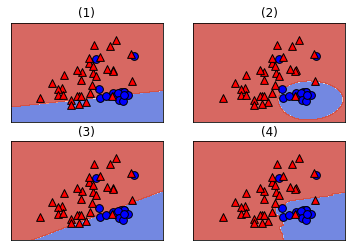

In [165]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier

# Define the classifiers
classifiers = [LogisticRegression(), SVC(), LinearSVC(), KNeighborsClassifier()]

# Fit the classifiers
for c in classifiers:
    c.fit(X, y)

# Plot the classifiers
plot_4_classifiers(X, y, classifiers)
plt.show()